# Assignment6

# Brain vs. Body Weight

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

1. Find the linear regression equation for this data for brain weight to body weight.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("brain_body.txt")

In [3]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [5]:
df.shape

(62, 2)

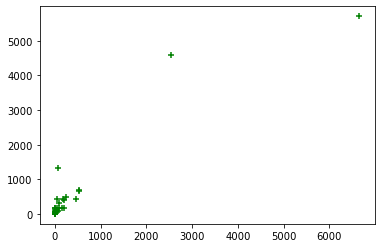

In [6]:

plt.scatter(x=df["Brain"], y=df["Body"], color="green",marker="+")



In [7]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [8]:
import math
x=np.log2(df.Brain)
y=np.log2(df.Body)


In [10]:
# split the training and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [15]:
# Model fitting
# Find the linear regression equation for this data.
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
"Symtax : varName = ModelName(modelHyperParams)"
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2=lr.score(y_test,y_pred)
coeffecient=lr.coef_
inter=lr.intercept_
print(r2) 

0.5767685364071481


In [21]:
print(y_pred)

[[ 4.63520311]
 [ 4.43621499]
 [ 7.62577509]
 [ 8.71392257]
 [ 5.6379688 ]
 [ 2.42019467]
 [ 7.02780385]
 [ 8.99964704]
 [ 1.67119624]
 [12.84960244]
 [ 2.26916748]
 [ 2.76428545]
 [ 3.61865569]]


2. Chart the original data and the equation on the chart.

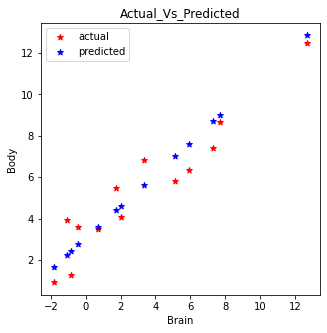

In [18]:

#changing size of plot
plt.figure(figsize=(5,5))
plt.ylabel("Body")
plt.xlabel("Brain")
plt.scatter(x_test,y_test,color ="r",label = "actual",marker = "*")
plt.scatter(x_test,y_pred,color ="b",label = "predicted",marker = "*")
plt.title("Actual_Vs_Predicted")

#adding legend
plt.legend()
plt.show()

3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8838083775622344
